In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [80]:
df = pd.read_csv('spam.csv',encoding = 'ISO-8859-1')

In [81]:
df.shape

(5572, 5)

In [82]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [83]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [84]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [85]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace = True)

In [86]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [87]:
df.rename(columns = {'v1': 'Target', 'v2': 'Text'},inplace = True)

In [88]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [89]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [90]:
df['Target'] = encoder.fit_transform(df['Target'])
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [91]:
df.duplicated().sum()

403

In [92]:
df = df.drop_duplicates(keep = 'first')

In [93]:
df.shape

(5169, 2)

In [94]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

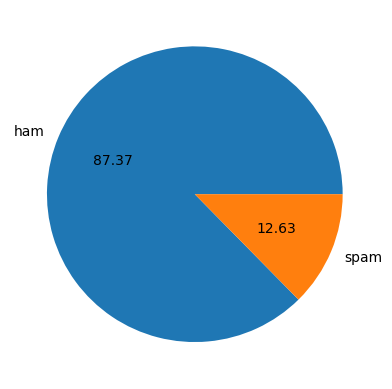

In [95]:
plt.pie(df['Target'].value_counts(), labels = ['ham','spam'],autopct = '%0.2f')
plt.show()

In [96]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [97]:
import nltk

In [98]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Red
[nltk_data]     Devil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [99]:
True

True

In [100]:
df['Num_characters'] = df['Text'].apply(len)
df.head()

,Target,Text,Num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [101]:
df['Num_words'] = df['Text'].apply(lambda x : len(nltk.sent_tokenize(x)))
df.head()

,Target,Text,Num_characters,Num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,2
1,0,Ok lar... Joking wif u oni...,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2
3,0,U dun say so early hor... U c already then say...,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1


In [102]:
df['Num_sentences'] = df['Text'].apply(lambda x : len(nltk.sent_tokenize(x)))
df.head()

,Target,Text,Num_characters,Num_words,Num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,2,2
1,0,Ok lar... Joking wif u oni...,29,2,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,2
3,0,U dun say so early hor... U c already then say...,49,1,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,1


In [103]:
df[['Num_characters','Num_words','Num_sentences']].describe()

,Num_characters,Num_words,Num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,1.947185,1.947185
std,58.236293,1.362406,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,1.000000
50%,60.000000,1.000000,1.000000
75%,117.000000,2.000000,2.000000
max,910.000000,28.000000,28.000000


In [104]:
df[df['Target']==0][['Num_characters','Num_words','Num_sentences']].describe()

,Num_characters,Num_words,Num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,1.799601,1.799601
std,56.358207,1.278465,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,1.000000,1.000000
50%,52.000000,1.000000,1.000000
75%,90.000000,2.000000,2.000000
max,910.000000,28.000000,28.000000


<Axes: xlabel='Num_characters', ylabel='Count'>

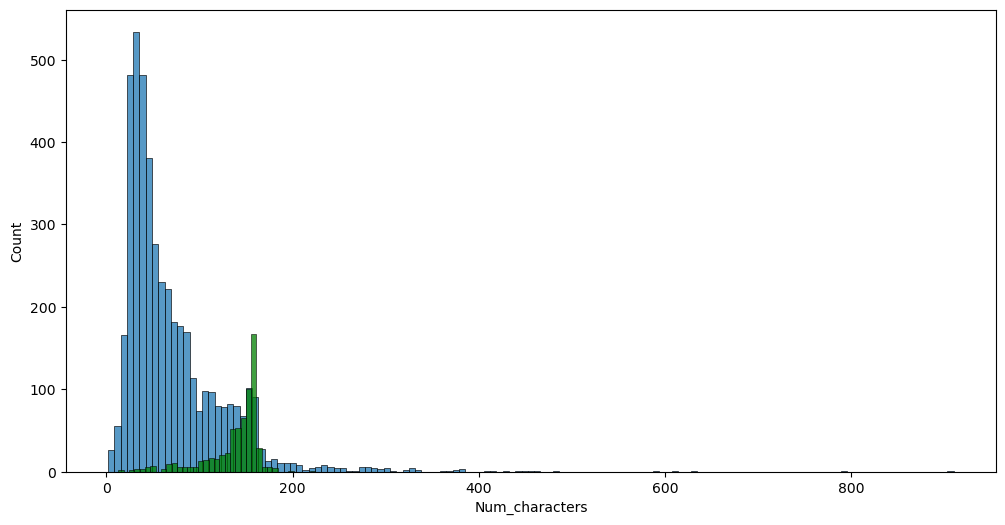

In [105]:
plt.figure(figsize =(12,6))
sns.histplot(df[df['Target']==0]['Num_characters'])
sns.histplot(df[df['Target']==1]['Num_characters'],color = 'green')

<Axes: xlabel='Num_words', ylabel='Count'>

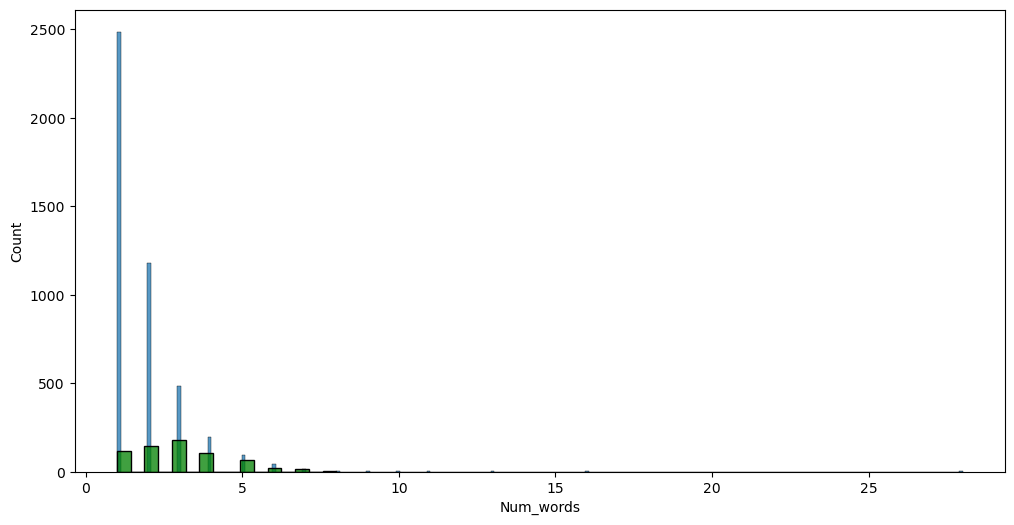

In [106]:
plt.figure(figsize =(12,6))
sns.histplot(df[df['Target']==0]['Num_words'])
sns.histplot(df[df['Target']==1]['Num_words'],color = 'green')

<Axes: xlabel='Num_sentences', ylabel='Count'>

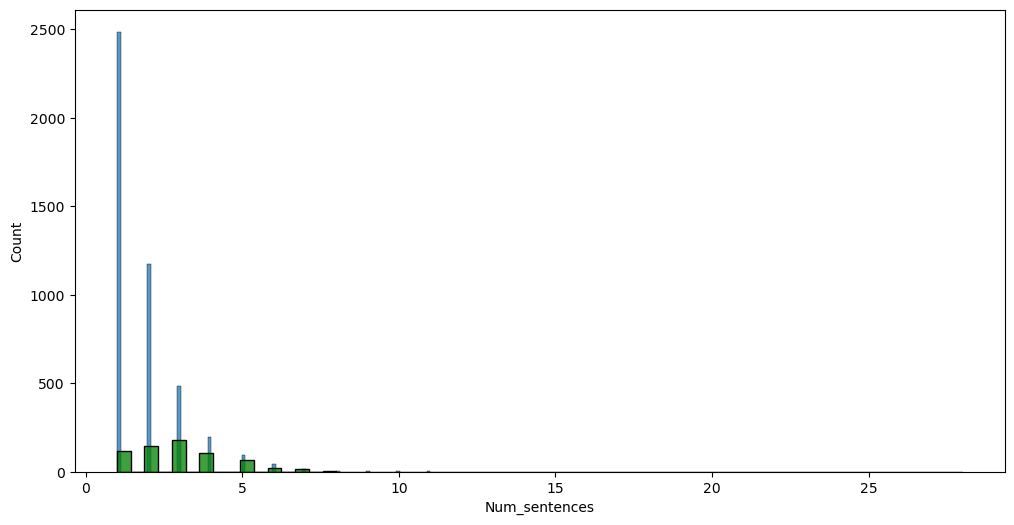

In [107]:
plt.figure(figsize =(12,6))
sns.histplot(df[df['Target']==0]['Num_sentences'])
sns.histplot(df[df['Target']==1]['Num_sentences'],color = 'green')

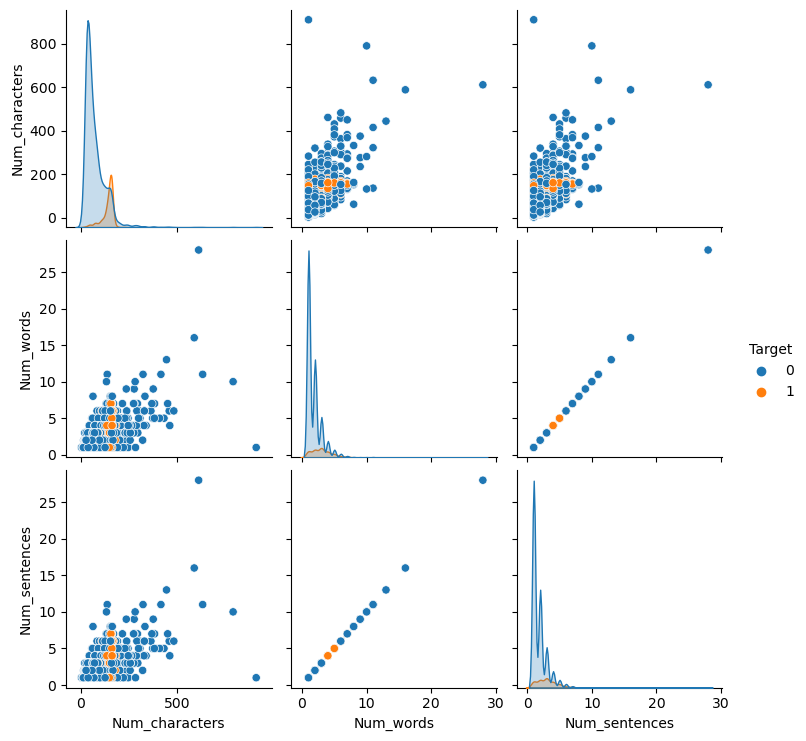

In [108]:
sns.pairplot(df,hue = 'Target')

C:\Users\Red Devil\AppData\Local\Temp\ipykernel_8656\2221401063.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

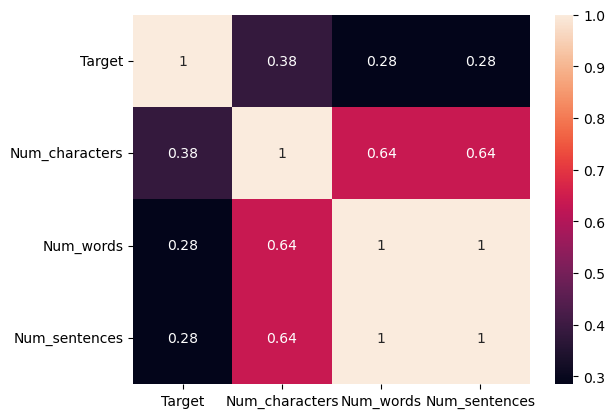

In [109]:
sns.heatmap(df.corr(),annot = True)

In [110]:
from nltk.corpus import stopwords

In [111]:
import string

In [112]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [113]:
def transform_text(Text):
    Text = Text.lower()
    Text = nltk.word_tokenize(Text)
    
    y = []
    for i in Text:
        if i.isalnum():
            y.append(i)
    Text = y[:]
    y.clear()
    
    for i in Text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [114]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'i gon na be home soon and i do want to talk about thi stuff anymor tonight k i cri enough today'

In [115]:
df['Text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [116]:
ps.stem('loving')

'love'

In [117]:
df['Transformed_text'] = df['Text'].apply(transform_text)

In [118]:
df.head()

,Target,Text,Num_characters,Num_words,Num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,2,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,1,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,1,nah i do think he goe to usf he live around he...


In [119]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [120]:
from wordcloud import WordCloud
wc = WordCloud(width = 500,height = 500,min_font_size = 10,background_color = 'white')

In [121]:
spam_wc = wc.generate(df[df['Target']==1]['Transformed_text'].str.cat(sep = " "))

In [122]:
plt.figure(figsize = (15,6))

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

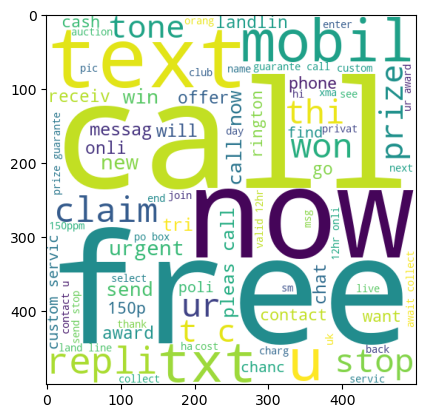

In [123]:
plt.imshow(spam_wc)

In [124]:
ham_wc = wc.generate(df[df['Target'] == 0]['Transformed_text'].str.cat(sep=" "))

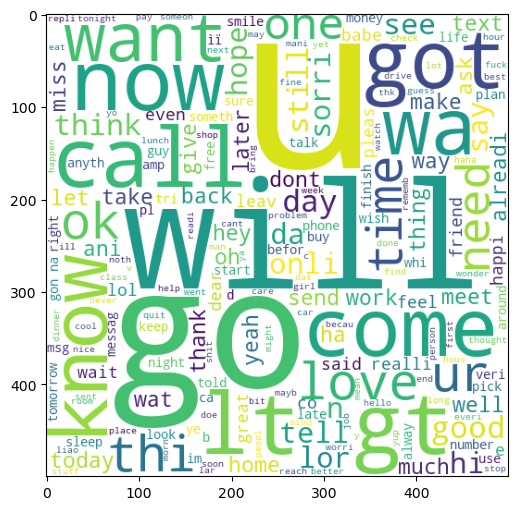

In [125]:
plt.figure(figsize =(15,6))
plt.imshow(ham_wc)

In [126]:
df.head()

,Target,Text,Num_characters,Num_words,Num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,2,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,1,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,1,nah i do think he goe to usf he live around he...


In [127]:
# Top words used in spam sms
spam_corpus = []
for msg in df[df['Target'] == 1]['Transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [128]:
len(spam_corpus)

14475

In [129]:
ham_corpus = []
for msg in df[df['Target']==0]['Transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [130]:
len(ham_corpus)

62799

In [131]:
df.head()

,Target,Text,Num_characters,Num_words,Num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,2,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,2,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,1,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,1,nah i do think he goe to usf he live around he...


In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from collections import Counter

In [133]:
vect = TfidfVectorizer(min_df = 1,stop_words = 'english',lowercase = True)

In [134]:
from sklearn.model_selection import train_test_split
df.loc[df['Target']=='spam','Target']=0
df.loc[df['Target']=='ham','Target']=1
X=df['Text']
y=df['Target']
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size = 20, random_state = 0 )
X_train_vect = vect.fit_transform(X_train)
X_test_vect = vect.transform(X_test)

In [135]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [136]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_vect,y_train)

LogisticRegression()

In [137]:
from sklearn.metrics import accuracy_score

In [138]:
pre = model.predict(X_test_vect)
acc = accuracy_score(y_test,pre)
print('Accuracy: ', acc.round(4)*100,"%" )

Accuracy:  100.0 %
